<a href="https://colab.research.google.com/github/geehaad/ML-master-projects/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Important Libraries 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [ ]:
#Generate the confusion matrix
def conf_matrix(y_testt, y_predd):
    cf_matrix_ = confusion_matrix(y_testt, y_predd)
    
    print(cf_matrix_)

    ax = sns.heatmap(cf_matrix_, annot=True,cmap=plt.cm.Blues)

    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    labels = y_testt.values
    sett = set()
    sett.update((labels))
    ax.xaxis.set_ticklabels(sett)
    ax.yaxis.set_ticklabels(sett)

    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [ ]:
# A function to drow the decidion boundries
def MakeDecision_Boundary(X_train_or_Test,y_train_or_Test,model, title_):
  fig, ax = plt.subplots()
  # title for the plots
  title = (title_)
  # Set-up grid for plotting.
  X0, X1 = X_train_or_Test[:, 0], X_train_or_Test[:, 1]
  xx, yy = make_meshgrid(X0, X1)

  plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
  ax.scatter(X0, X1, c=y_train_or_Test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
  ax.set_ylabel('od280/od315_of_diluted_wines')
  ax.set_xlabel('proline')
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(title)
  ax.legend()
  plt.show()

## Data Exploratory

In [ ]:
# Import data 
from sklearn.datasets import load_wine
data = load_wine()
data

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [ ]:
df = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

In [ ]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [ ]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [ ]:
dfv = df["target"].value_counts().to_frame()
dfv

,target
1.0,71
0.0,59
2.0,48


We have three classes

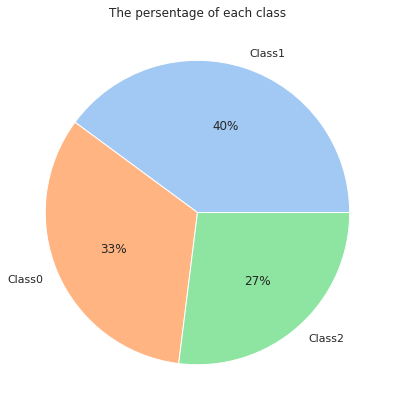

In [ ]:
#The percentage of each class
##define data
data = dfv.target
keys = ['Class1','Class0','Class2']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:3]

#Change the graph size
sns.set(rc={"figure.figsize":(7, 7)}) 

plt.title("The persentage of each class")
#create pie chart
plt.pie(data, labels = keys, colors = colors, autopct='%.0f%%')
plt.show()

## Modeling

### split the data into train, test

In [ ]:
X= df.loc[:, df.columns != 'target']
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_pred.shape

(36,)

### Model Evaluation

#### Classification_report for training data


In [ ]:
print(classification_report(gnb.predict(X_train), y_train))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        43
         1.0       0.96      0.96      0.96        57
         2.0       1.00      0.95      0.98        42

    accuracy                           0.97       142
   macro avg       0.97      0.97      0.97       142
weighted avg       0.97      0.97      0.97       142



#### Classification_report for testing data


In [ ]:
print(classification_report(gnb.predict(X_test), y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### Decison boundries

For simplicity, we only consider

*   2 features when plotting the decision boundary in this question.
*   We chose the two features using the correlation matrix.





In [ ]:
train = X_train 
train['target'] = y_train
test = X_test 
test['target'] = y_test

Text(38.593749999999986, 0.5, 'Fetuers axis_y')

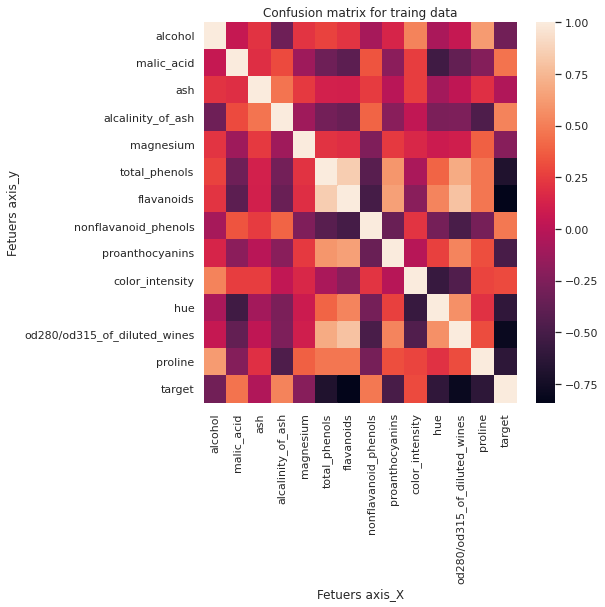

In [ ]:
corr=train.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

#Change the graph size
sns.set(rc={"figure.figsize":(6, 6)})
plt.title("Confusion matrix for traing data")
plt.xlabel("Fetuers axis_X")
plt.ylabel("Fetuers axis_y")





### We are going to choose the two features: proline,  od280/od315_of_diluted_wines

### Split the dataset


In [ ]:
X_train_, y_train_ = train[['proline',  'od280/od315_of_diluted_wines']], train['target']
X_test_, y_test_ = test[['proline',  'od280/od315_of_diluted_wines']], test['target']

### Train and test using GaussianNB with only the two features 


In [ ]:
gnbb = GaussianNB()
g = gnbb.fit(X_train_.values, y_train_.values)
y_pred_ = gnbb.predict(X_test_.values)
y_pred_

array([0., 0., 1., 0., 1., 0., 1., 2., 1., 1., 0., 2., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 2., 2., 2., 2., 1., 1., 1., 0., 0., 1., 2., 0.,
       0., 0.])

### Classification_report for training data with only the two features 


In [ ]:
print(classification_report(gnbb.predict(X_train_), y_train_))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95        46
         1.0       0.86      0.91      0.88        54
         2.0       0.93      0.88      0.90        42

    accuracy                           0.91       142
   macro avg       0.91      0.91      0.91       142
weighted avg       0.91      0.91      0.91       142



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


### Classification_report for testing data with only the two features 


In [ ]:
print(classification_report(gnbb.predict(X_test_), y_test_))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       0.93      0.87      0.90        15
         2.0       0.75      0.86      0.80         7

    accuracy                           0.92        36
   macro avg       0.89      0.91      0.90        36
weighted avg       0.92      0.92      0.92        36



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


### Decision Boundry using trainig set

No handles with labels found to put in legend.


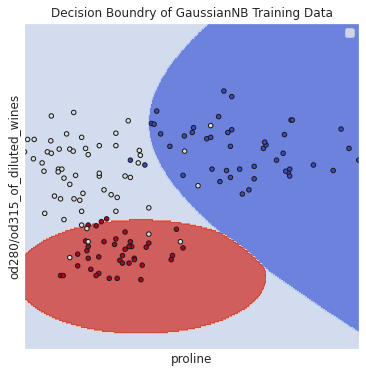

In [ ]:
MakeDecision_Boundary(X_train_.values,y_train_.values,gnbb,"Decision Boundry of GaussianNB Training Data")

### Decision Boundry using testing set

No handles with labels found to put in legend.


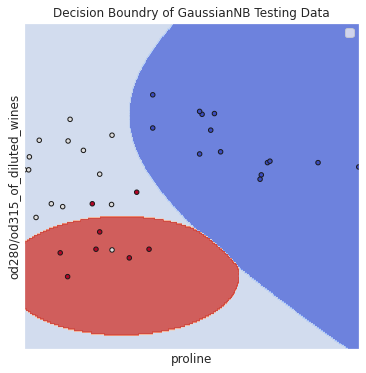

In [ ]:
MakeDecision_Boundary(X_test_.values,y_test_.values,gnbb,"Decision Boundry of GaussianNB Testing Data")

#Part (3) KNN

From the Dataset description in Kaggle, we added columns names . 

In [ ]:
col_names=['buying price', 'maintenance cost', 'number of doors', 'number of persons', 'lug_boot', 'safety', 'decision']
df_data = pd.read_csv('/content/drive/MyDrive/Assignment2_KNN/car_evaluation.csv',names=col_names)


In [ ]:
df_data

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


## Encoding categorical values using Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
# label_encoder object
label_encoder =LabelEncoder()
# Encode labels in column.
dff=  df_data
dff['buying price'] = label_encoder.fit_transform(dff['buying price'])
dff['maintenance cost'] = label_encoder.fit_transform(dff['maintenance cost'])
dff['number of doors'] = label_encoder.fit_transform(dff['number of doors'])
dff['number of persons'] = label_encoder.fit_transform(dff['number of persons'])
dff['lug_boot'] = label_encoder.fit_transform(dff['lug_boot'])
dff['safety'] = label_encoder.fit_transform(dff['safety'])
dff['decision'] = label_encoder.fit_transform(dff['decision'])

In [ ]:
dff

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


## Split and shuffle the dataset

In [ ]:
Xx = dff.loc[:, dff.columns != 'decision']
yy = dff['decision']

### Split first train and remainder is test and validation set

In [ ]:
x_train, x_remain, y_train, y_remain = train_test_split(Xx,yy,train_size=1000)


### split the remain to test and validation


In [ ]:
x_val, x_test, y_val, y_test = train_test_split(x_remain,y_remain,test_size =428)

x_train, y_train <br>
x_val, y_val <br>
x_test, y_test <br>

#Modeling
##KNN Classifier
### K = 2

We use different number of training samples to show the impact of number of training samples.
And will use validation 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Part C :


*  ###  10%,20%,30%,40%,50%,60%,70%,80%,90% and 100% precenatge of data of the training set for 10 separate KNN classifiers and show their performance (accuracy score) on the validation set and testing set.
*  ### Split first train, with different patrtitions, and remainder is test and validation set split the remain to test and validation




In [ ]:
from sklearn import metrics
import time

trainlst=[]
def split_train_by_Precentage(per):
  x_train_, x_remain_, y_train_, y_remain_ = train_test_split(Xx,yy,train_size=int(1000*per))
  knn = KNeighborsClassifier(n_neighbors=2)
  start = time.time() #Start time
  knn.fit(x_train_, y_train_)
  end = time.time()   #End time
  accTrain=knn.predict(x_train_)
  print(classification_report(knn.predict(x_train_), y_train_))
  accTrainlst=metrics.accuracy_score(y_train_, accTrain)
  trainlst.append(accTrainlst)
  y_pred_val = knn.predict(x_val)
  acc_val  = metrics.accuracy_score(y_val, y_pred_val)
  print('percentage', int(per*100), '% of the data, with k=', 2)
  print('---------------------------')
  print('The accuracy of the Training data: ', '{:.3f}'.format(accTrainlst*100) ,'%')
  print('The accuracy of the validation data: ', '{:.3f}'.format(acc_val*100) ,'%')
  y_pred_test = knn.predict(x_test)
  acc_test = metrics.accuracy_score(y_test, y_pred_test)
  print('The accuracy of the test data: ', '{:.3f}'.format( acc_test*100 ) , '%')
  print('___________________________________________________________')
  print('\n')
  return acc_test, acc_val

### 10% of training with k=2

In [ ]:
a1, v1 = split_train_by_Precentage(.1)

              precision    recall  f1-score   support

           0       1.00      0.62      0.77        40
           1       1.00      1.00      1.00         1
           2       0.80      1.00      0.89        55
           3       0.80      1.00      0.89         4

    accuracy                           0.85       100
   macro avg       0.90      0.91      0.89       100
weighted avg       0.88      0.85      0.84       100

percentage 10 % of the data, with k= 2
---------------------------
The accuracy of the Training data:  85.000 %
The accuracy of the validation data:  63.000 %
The accuracy of the test data:  63.318 %
___________________________________________________________




### 20% of training with k=2


In [ ]:
a2, v2 = split_train_by_Precentage(.2)

              precision    recall  f1-score   support

           0       1.00      0.68      0.81        68
           1       0.80      0.57      0.67         7
           2       0.87      1.00      0.93       121
           3       0.40      1.00      0.57         4

    accuracy                           0.88       200
   macro avg       0.77      0.81      0.74       200
weighted avg       0.90      0.88      0.87       200

percentage 20 % of the data, with k= 2
---------------------------
The accuracy of the Training data:  87.500 %
The accuracy of the validation data:  73.333 %
The accuracy of the test data:  71.262 %
___________________________________________________________




###  30% of training with k=2


In [ ]:
a3, v3 = split_train_by_Precentage(.3)

              precision    recall  f1-score   support

           0       1.00      0.67      0.81        95
           1       0.77      0.77      0.77        13
           2       0.85      0.98      0.91       181
           3       0.79      1.00      0.88        11

    accuracy                           0.88       300
   macro avg       0.85      0.86      0.84       300
weighted avg       0.89      0.88      0.87       300

percentage 30 % of the data, with k= 2
---------------------------
The accuracy of the Training data:  87.667 %
The accuracy of the validation data:  70.667 %
The accuracy of the test data:  72.430 %
___________________________________________________________




### 40% of training with k=2

In [ ]:
a4, v4 = split_train_by_Precentage(.4)

              precision    recall  f1-score   support

           0       1.00      0.69      0.82       130
           1       0.69      0.61      0.65        18
           2       0.86      0.99      0.92       244
           3       0.67      1.00      0.80         8

    accuracy                           0.88       400
   macro avg       0.80      0.82      0.80       400
weighted avg       0.89      0.88      0.87       400

percentage 40 % of the data, with k= 2
---------------------------
The accuracy of the Training data:  87.750 %
The accuracy of the validation data:  73.333 %
The accuracy of the test data:  74.766 %
___________________________________________________________




### 50% of training with k=2

In [ ]:
a5, v5 = split_train_by_Precentage(.5)

              precision    recall  f1-score   support

           0       1.00      0.71      0.83       150
           1       0.74      0.70      0.72        20
           2       0.89      0.99      0.94       319
           3       0.50      1.00      0.67        11

    accuracy                           0.89       500
   macro avg       0.78      0.85      0.79       500
weighted avg       0.91      0.89      0.89       500

percentage 50 % of the data, with k= 2
---------------------------
The accuracy of the Training data:  89.200 %
The accuracy of the validation data:  77.667 %
The accuracy of the test data:  78.037 %
___________________________________________________________




### 60% of training with k=2


In [ ]:
a6, v6 = split_train_by_Precentage(.6)

              precision    recall  f1-score   support

           0       1.00      0.73      0.84       198
           1       0.80      0.73      0.76        22
           2       0.88      0.99      0.93       367
           3       0.54      1.00      0.70        13

    accuracy                           0.90       600
   macro avg       0.81      0.86      0.81       600
weighted avg       0.91      0.90      0.89       600

percentage 60 % of the data, with k= 2
---------------------------
The accuracy of the Training data:  89.500 %
The accuracy of the validation data:  77.000 %
The accuracy of the test data:  77.804 %
___________________________________________________________




### 70% of training with k=2

In [ ]:
a7, v7 = split_train_by_Precentage(.7)

              precision    recall  f1-score   support

           0       1.00      0.67      0.80       227
           1       0.44      0.69      0.54        16
           2       0.88      0.99      0.93       439
           3       0.64      1.00      0.78        18

    accuracy                           0.88       700
   macro avg       0.74      0.84      0.76       700
weighted avg       0.90      0.88      0.88       700

percentage 70 % of the data, with k= 2
---------------------------
The accuracy of the Training data:  88.000 %
The accuracy of the validation data:  79.333 %
The accuracy of the test data:  78.505 %
___________________________________________________________




### 80% of training with k=2

In [ ]:
a8, v8 = split_train_by_Precentage(.8)

              precision    recall  f1-score   support

           0       1.00      0.74      0.85       235
           1       0.83      0.68      0.75        44
           2       0.89      0.98      0.94       510
           3       0.39      1.00      0.56        11

    accuracy                           0.90       800
   macro avg       0.78      0.85      0.78       800
weighted avg       0.91      0.90      0.90       800

percentage 80 % of the data, with k= 2
---------------------------
The accuracy of the Training data:  89.625 %
The accuracy of the validation data:  78.667 %
The accuracy of the test data:  80.374 %
___________________________________________________________




### 90% of training with k=2

In [ ]:
a9, v9 = split_train_by_Precentage(.9)

              precision    recall  f1-score   support

           0       1.00      0.72      0.84       298
           1       0.61      0.76      0.68        33
           2       0.89      0.99      0.94       553
           3       0.53      1.00      0.70        16

    accuracy                           0.89       900
   macro avg       0.76      0.87      0.79       900
weighted avg       0.91      0.89      0.89       900

percentage 90 % of the data, with k= 2
---------------------------
The accuracy of the Training data:  89.111 %
The accuracy of the validation data:  81.667 %
The accuracy of the test data:  82.477 %
___________________________________________________________




### 100% of training with k=2


In [ ]:
a10, v10 = split_train_by_Precentage(1)

              precision    recall  f1-score   support

           0       1.00      0.71      0.83       299
           1       0.80      0.85      0.82        41
           2       0.89      0.99      0.94       635
           3       0.62      1.00      0.77        25

    accuracy                           0.90      1000
   macro avg       0.83      0.89      0.84      1000
weighted avg       0.91      0.90      0.90      1000

percentage 100 % of the data, with k= 2
---------------------------
The accuracy of the Training data:  90.000 %
The accuracy of the validation data:  83.667 %
The accuracy of the test data:  82.710 %
___________________________________________________________





The highest accuracy the model makes when it uses 80% of the training data, this with fixed number of k= 2

In [ ]:
arr = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10]
vrr = [v1,v2,v3,v4,v5,v6,v7,v8,v9,v10]
p =   [10,20,30,40,50,60,70,80,90,100]

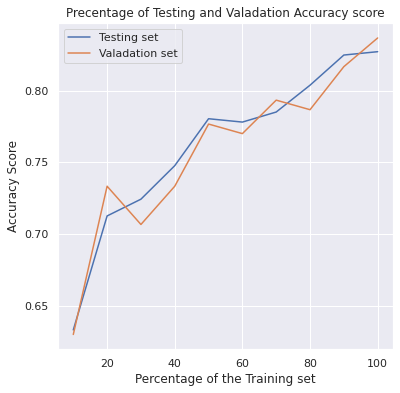

In [ ]:
import matplotlib.pyplot as plt

# plotting the line 2 points 
plt.plot(p,arr,  label = "Testing set", markersize=10)
plt.plot(p,vrr,  label = "Valadation set", markersize=10)
plt.xlabel('Percentage of the Training set')
# Set the y axis label of the current axis.
plt.ylabel('Accuracy Score')
# Set a title of the current axes.
plt.title('Precentage of Testing and Valadation Accuracy score')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [ ]:
import matplotlib.pyplot as plt
def plot(lst,p):
  # plotting the line 2 points 
  plt.plot(p,lst,  label = "Training set", markersize=10)
  plt.xlabel('Percentage of the Training set')
  # Set the y axis label of the current axis.
  plt.ylabel('Accuracy Score')
  # Set a title of the current axes.
  plt.title('Time of Training Dataset')
  # show a legend on the plot
  plt.legend()
  # Display a figure.
  plt.show()

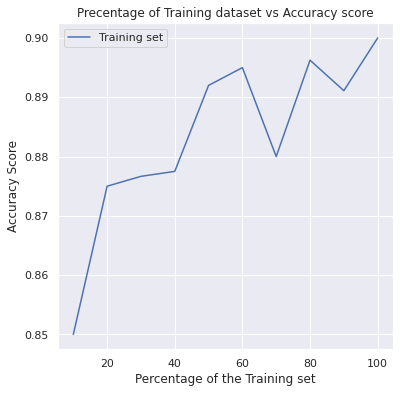

In [ ]:
plot(trainlst,p)

The curve shows that the accuracy of the test and validation varies by using different samples of the training data.

##100% of training samples, with different k values

In [ ]:
x_train, x_remain, y_train, y_remain = train_test_split(Xx,yy,train_size= 1000)
x_val, x_test, y_val, y_test = train_test_split(x_remain,y_remain,train_size = 300,test_size =428)

Maximum accuracy: 89.667% at K = 6


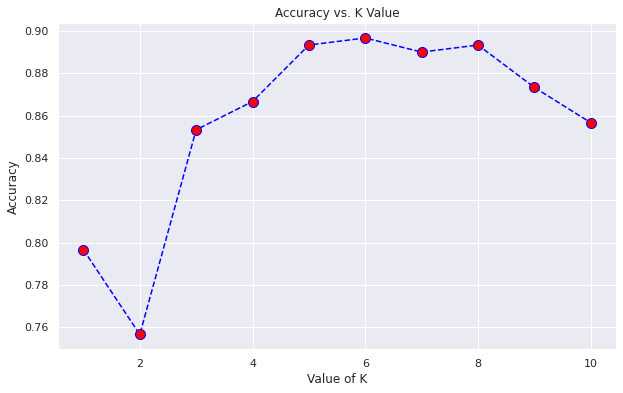

In [ ]:
acc = []
from sklearn import metrics
for i in range(1,11):
    Knn_model = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    prediction = Knn_model.predict(x_val)
    acc.append(metrics.accuracy_score(y_val, prediction))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,11),acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
print("Maximum accuracy:",'{:.3f}%'.format(max(acc)*100),"at K =",acc.index(max(acc))+1)

By using different values of k, varies from 1 to 10, and the full training samples, we found out that the highest accuarcy is when using k=5 .

In [ ]:
x_train.shape

(1000, 6)

### KNN function that takes Percenatge and number of K.


In [ ]:

def Best_ValueOf_K(per, k):
  x_train_, x_remain_, y_train_, y_remain_ = train_test_split(Xx,yy,train_size=int(1000*per))
  #x_val_, x_test_, y_val_, y_test_ = train_test_split(x_remain_,y_remain_,train_size = 300,test_size =428)
  knn = KNeighborsClassifier(n_neighbors=k)

  start_tr = time.time() #Start time for predict train data
  knn.fit(x_train_, y_train_)
  end_tr = time.time()   #End time for predict train data
  tr = end_tr-start_tr 
  y_pred_train = knn.predict(x_train_)
  acc_train  = metrics.accuracy_score(y_train_, y_pred_train)
  
  y_pred_val = knn.predict(x_val)
  acc_val  = metrics.accuracy_score(y_val, y_pred_val)
  print('percentage', int(per*100), '% of the data, with k=', k)
  print('---------------------------')
  print('The accuracy of the Training data: ', '{:.3f}'.format(acc_train*100), '%')
  print('The accuracy of the validation data: ', '{:.3f}'.format(acc_val*100), '%')

  start_te = time.time() #Start time for predict test data
  y_pred_test = knn.predict(x_test)
  end_te = time.time()   #End time for predict test data
  te = end_te-start_te

  acc_test = metrics.accuracy_score(y_test, y_pred_test)
  print('The accuracy of the test data: ', '{:.3f}'.format( acc_test*100), '%')
  
  print('*********************************')
  print('Training time ',  '{:.3f}'.format( tr))
  print('Testing time', '{:.3f}'.format( te))
  print('___________________________________________________________')
  print('\n')
  return acc_test, acc_val, tr, te

### 10% of the whole training set and K = 2

In [ ]:
ac1, va1, ti_tr1, ti_te1 = Best_ValueOf_K(.1, 2)

percentage 10 % of the data, with k= 2
---------------------------
The accuracy of the Training data:  83.000 %
The accuracy of the validation data:  63.333 %
The accuracy of the test data:  66.822 %
*********************************
Training time  0.006
Testing time 0.031
___________________________________________________________




###100% of the whole training set and K = 2


In [ ]:
ac2, va2, ti_tr2, ti_te2 = Best_ValueOf_K(1, 2)

percentage 100 % of the data, with k= 2
---------------------------
The accuracy of the Training data:  89.600 %
The accuracy of the validation data:  83.000 %
The accuracy of the test data:  84.112 %
*********************************
Training time  0.011
Testing time 0.039
___________________________________________________________




###10% of the whole training set and K = 10


In [ ]:
ac3, va3, ti_tr3, ti_te3 = Best_ValueOf_K(.1, 10)

percentage 10 % of the data, with k= 10
---------------------------
The accuracy of the Training data:  74.000 %
The accuracy of the validation data:  67.000 %
The accuracy of the test data:  72.430 %
*********************************
Training time  0.006
Testing time 0.020
___________________________________________________________




### 100% of the whole training set and K = 10


In [ ]:
ac4, va4, ti_tr4, ti_te4 =  Best_ValueOf_K(1, 10)

percentage 100 % of the data, with k= 10
---------------------------
The accuracy of the Training data:  90.700 %
The accuracy of the validation data:  87.667 %
The accuracy of the test data:  89.720 %
*********************************
Training time  0.007
Testing time 0.031
___________________________________________________________




In [ ]:
ttime = [ti_tr1, ti_tr2, ti_tr3,ti_tr3] #time of test prediction
label = ['10%, k=2','100%, k=2','10%, k=10','100%, k=10'] #Cases

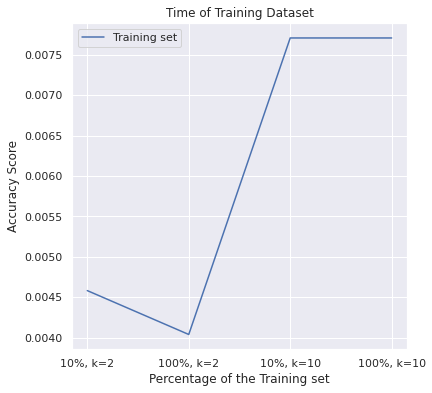

In [ ]:
plot(ttime,label)

## Make list append time of Training

Text(0.5, 1.0, 'Partitions and Ks vs time of Training')

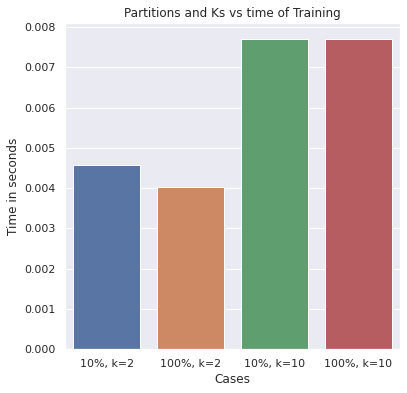

In [ ]:
ax = sns.barplot(x=label, y=ttime)
plt.xlabel('Cases')
plt.ylabel('Time in seconds')
plt.title('Partitions and Ks vs time of Training')

## Make list append time of test **prediction**

In [ ]:
test_time = [ti_te1, ti_te2, ti_te3,ti_te3] #time of test prediction
label = ['10%, k=2','100%, k=2','10%, k=10','100%, k=10'] #Cases

### **Plot** the prediction time on the testing set.

Text(0.5, 1.0, 'Partitions and Ks vs time of Test Prediction')

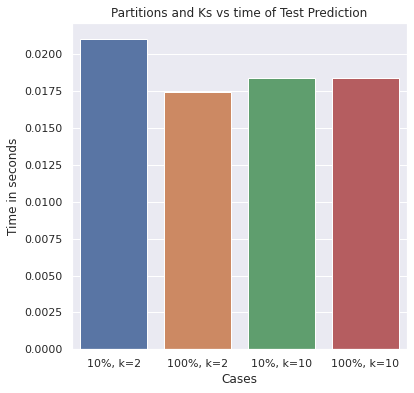

In [ ]:
ax = sns.barplot(x=label, y=test_time)
plt.xlabel('Cases')
plt.ylabel('Time in seconds')
plt.title('Partitions and Ks vs time of Test Prediction')